In [2]:
import pandas as pd

avaliacoes = pd.read_csv("b2w.csv")
avaliacoes.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [3]:
avaliacoes = avaliacoes.drop(["original_index", "review_text_processed", "review_text_tokenized", "rating", "kfold_polarity", "kfold_rating"], axis = 1)

In [4]:
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
4,Além de higiênico tem o tamanho ideal. Só falt...,NaN


In [5]:
avaliacoes.dropna(inplace=True, axis=0)
avaliacoes

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0
...,...,...
132367,"Ótimo jogo, um dos melhores que joguei. Entreg...",1.0
132368,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,1.0
132369,Eu estou muito chateado com isso gostaria que ...,0.0
132371,O produto anunciado no site dizia ser 100% al...,0.0


In [6]:
avaliacoes.polarity.value_counts()

polarity
1.0    80300
0.0    35758
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(avaliacoes.review_text, 
                                                             avaliacoes.polarity, stratify=avaliacoes.polarity, random_state= 71)

In [8]:
classe_teste

70278     1.0
115089    1.0
128187    0.0
68697     0.0
50025     1.0
         ... 
25617     1.0
106407    1.0
26220     1.0
109010    0.0
49437     0.0
Name: polarity, Length: 29015, dtype: float64

In [9]:
from sklearn.linear_model import LogisticRegression

# regressao_logistica = LogisticRegression()

# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(acuracia)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Este produto é muito bom", 'Este produto é muito ruim']
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [11]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [12]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [13]:
matriz_esparsa

,bom,este,muito,produto,ruim
0,1,1,1,1,0
1,0,1,1,1,1


In [14]:
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 50508)


In [15]:
vetorizar = CountVectorizer(max_features=100)
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [16]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, avaliacoes.polarity, stratify= avaliacoes.polarity, random_state=71)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.8873686024470102


In [17]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
    vetorizar = CountVectorizer(max_features=100)
    bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, avaliacoes.polarity, stratify= avaliacoes.polarity, random_state=71)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)



In [18]:
print(treinar_modelo(avaliacoes, "review_text", "polarity"))

0.8873686024470102


# Word cloud


In [19]:
from wordcloud import WordCloud

todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)


In [20]:
len(todas_avaliacoes)

116058

In [21]:
len(todas_palavras)

16570763

In [22]:
nuvem_palavras = WordCloud().generate(todas_palavras)

In [23]:
nuvem_palavras

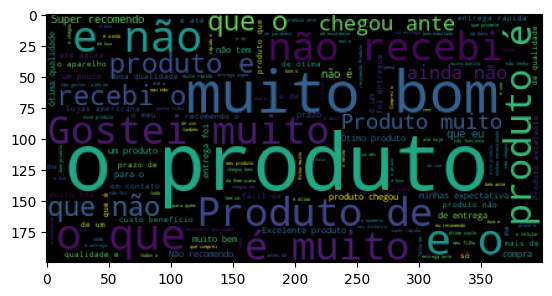

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(nuvem_palavras)

In [25]:
nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110).generate(todas_palavras)

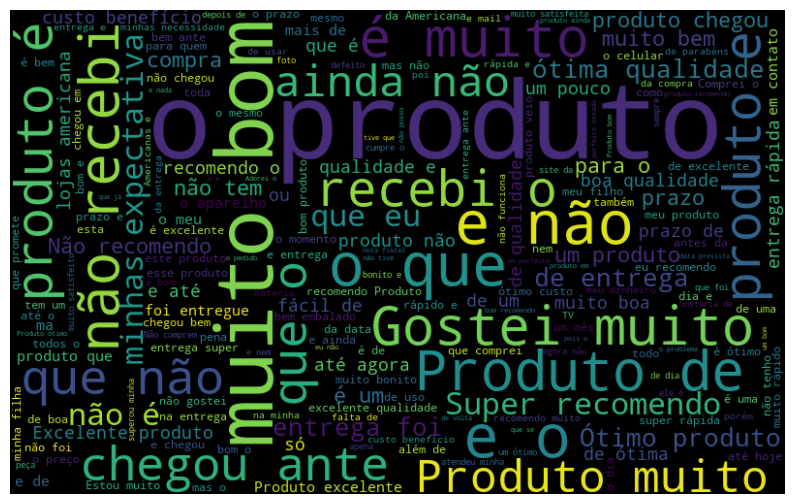

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
def word_cloud_neg(dados, coluna_texto):
    texto_negativo = dados.query("polarity == 0")
    todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
    todas_palavras = ' '.join(todas_avaliacoes)
    nuvem_palavras = WordCloud(width=800, 
                               height=500,
                             max_font_size=110, 
                             collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [29]:
def word_cloud_pos(dados, coluna_texto):
    texto_positivo = dados.query("polarity == 1")
    todas_avaliacoes = [texto for texto in texto_positivo[coluna_texto]]
    todas_palavras = ' '.join(todas_avaliacoes)
    nuvem_palavras = WordCloud(width=800, 
                               height=500,
                             max_font_size=110, 
                             collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

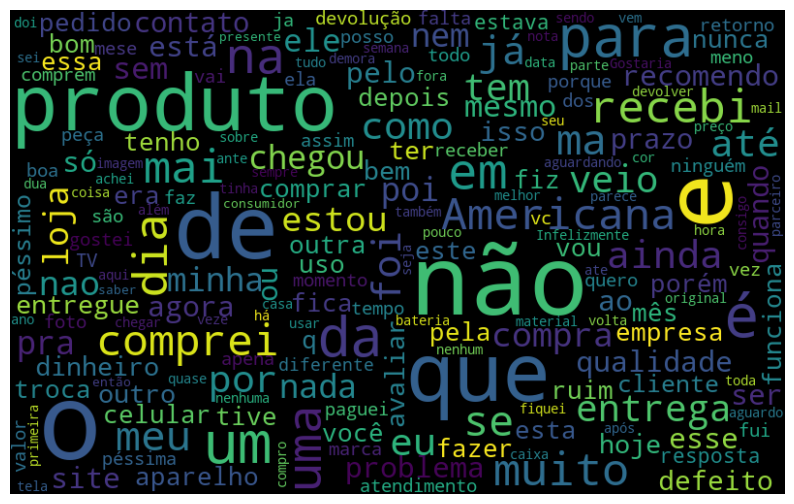

In [30]:
word_cloud_neg(avaliacoes, "review_text")

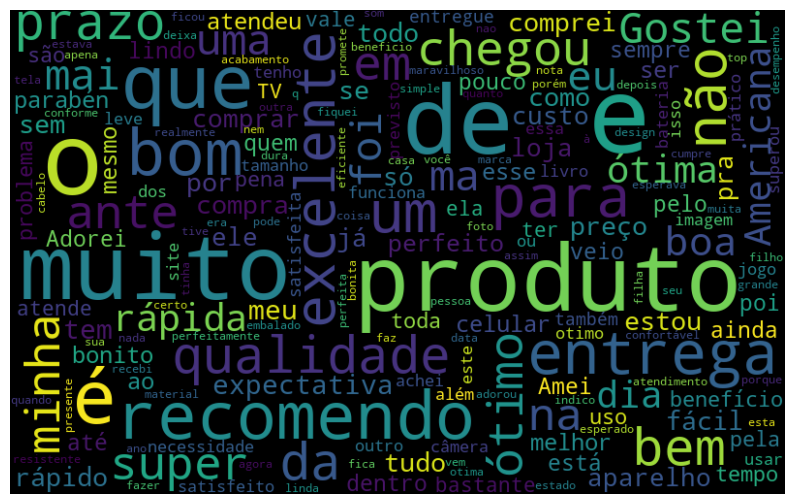

In [31]:
word_cloud_pos(avaliacoes, "review_text")